# _Capstone project - Indoor GPS_

# Import all required modules

In [52]:
# core
import numpy as np
import pandas as pd
import scipy
from math import sqrt
from matplotlib import pyplot as plt, dates as mdates
import seaborn as sns

# SKLearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold

# models
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Import dataset

In [2]:
data = pd.read_csv("trainingData.csv")

In [3]:
data.drop(['LONGITUDE', 'LATITUDE', 'USERID', 'PHONEID', 'TIMESTAMP'], axis=1, inplace=True)

In [4]:
data.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,106,2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,106,2
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,2,1,103,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,102,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,0,0,122,2


# Preprocess dataset

In [5]:
data.dropna()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,106,2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,106,2
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,2,1,103,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,102,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,0,0,122,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,3,1,1,2
19933,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,1,2,140,2
19934,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,3,1,13,2
19935,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,3,1,113,2


In [6]:
data.drop_duplicates()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,106,2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,106,2
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,2,1,103,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,102,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,0,0,122,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,3,1,1,2
19933,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,1,2,140,2
19934,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,3,1,13,2
19935,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,3,1,113,2


# Sampling

<AxesSubplot:title={'center':'Sample per building'}>

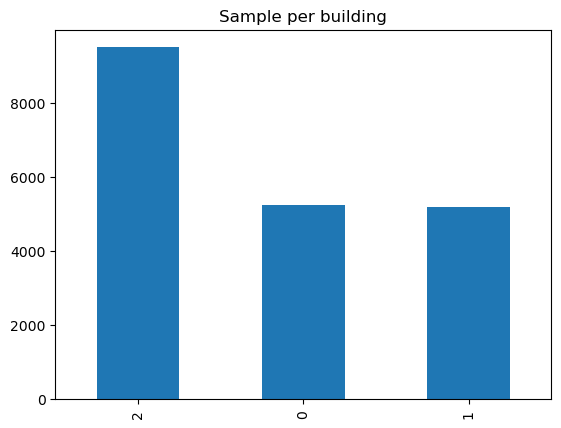

In [7]:
data['BUILDINGID'].value_counts().plot(kind='bar', title ='Sample per building')

In [8]:
dataB2 = data[(data['BUILDINGID'] == 2)].copy(deep=True)

In [9]:
dataB2.head(3)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
46,100,100,100,100,100,100,100,100,100,100,...,100,100,-93,100,100,100,3,2,247,2
47,100,100,100,100,100,100,100,100,100,100,...,100,100,-89,100,100,100,3,2,248,2
49,100,100,100,100,100,100,100,100,100,100,...,100,100,100,-91,100,100,3,2,247,1


<AxesSubplot:title={'center':'Sample per floor'}>

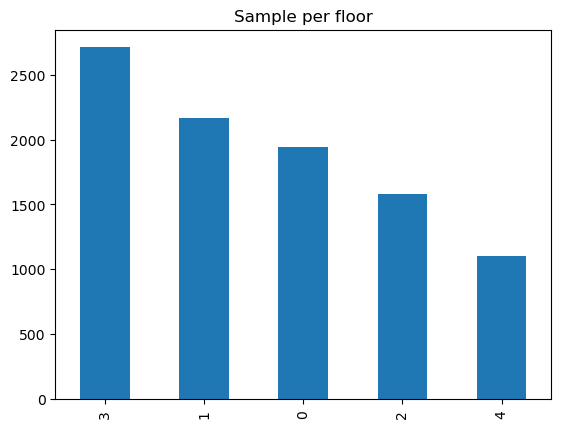

In [10]:
dataB2['FLOOR'].value_counts().plot(kind='bar', title ='Sample per floor')

In [11]:
dataB2F3 = dataB2[(dataB2['FLOOR'] == 3)].copy(deep=True)

In [12]:
dataB2F3.head(3)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
46,100,100,100,100,100,100,100,100,100,100,...,100,100,-93,100,100,100,3,2,247,2
47,100,100,100,100,100,100,100,100,100,100,...,100,100,-89,100,100,100,3,2,248,2
49,100,100,100,100,100,100,100,100,100,100,...,100,100,100,-91,100,100,3,2,247,1


### Remove all columns that have a variance of zero.

In [13]:
wapB2 = dataB2.iloc[:,:520]

In [14]:
dataB2NW = dataB2.iloc[:,520:]

In [15]:
wapB2F3 =dataB2F3.iloc[:,:520]

In [16]:
dataB2F3NW = dataB2F3.iloc[:,520:]

In [17]:
threshold_n=0.95
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(wapB2)
wapB2 = wapB2[wapB2.columns[sel.get_support(indices=True)]] 

In [18]:
threshold_n=0.95
sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))
sel_var=sel.fit_transform(wapB2F3)
wapB2F3 = wapB2F3[wapB2F3.columns[sel.get_support(indices=True)]] 

In [19]:
dataB2_oob = pd.concat([wapB2, dataB2NW], axis=1)

In [20]:
dataB2_oob.head(1)

,WAP005,WAP006,WAP011,WAP012,WAP018,WAP059,WAP060,WAP061,WAP062,WAP063,...,WAP512,WAP513,WAP514,WAP516,WAP517,WAP518,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
46,100,100,100,100,100,-97,100,-85,-90,-80,...,100,100,100,100,-93,100,3,2,247,2


In [21]:
dataB2F3_oob = pd.concat([wapB2F3, dataB2F3NW], axis=1)

In [22]:
dataB2F3_oob.head(1)

,WAP005,WAP006,WAP011,WAP012,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,...,WAP510,WAP511,WAP512,WAP516,WAP517,WAP518,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
46,100,100,100,100,-97,100,-85,-90,-80,-79,...,100,100,100,100,-93,100,3,2,247,2


### Leave variables of known location

#### Building 2

In [23]:
dataB2_oob ['LOCATION'] = dataB2_oob ['FLOOR'].astype(str) + '-' + dataB2_oob ['BUILDINGID'].astype(str) + '-' + dataB2_oob ['SPACEID'].astype(str) + '-' + dataB2_oob ['RELATIVEPOSITION'].astype(str)

In [24]:
dataB2_oob .head(1)

,WAP005,WAP006,WAP011,WAP012,WAP018,WAP059,WAP060,WAP061,WAP062,WAP063,...,WAP513,WAP514,WAP516,WAP517,WAP518,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,LOCATION
46,100,100,100,100,100,-97,100,-85,-90,-80,...,100,100,100,-93,100,3,2,247,2,3-2-247-2


In [25]:
dataB2_oob .drop(['FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION'], axis=1, inplace=True)

In [26]:
dataB2_oob .head(1)

,WAP005,WAP006,WAP011,WAP012,WAP018,WAP059,WAP060,WAP061,WAP062,WAP063,...,WAP509,WAP510,WAP511,WAP512,WAP513,WAP514,WAP516,WAP517,WAP518,LOCATION
46,100,100,100,100,100,-97,100,-85,-90,-80,...,100,100,100,100,100,100,100,-93,100,3-2-247-2


In [27]:
dataB2_oob ['LOCATION'] = dataB2_oob ['LOCATION'].astype(object)

In [28]:
dataB2_oob .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9492 entries, 46 to 19933
Columns: 204 entries, WAP005 to LOCATION
dtypes: int64(203), object(1)
memory usage: 14.8+ MB


#### Building 2 Floor 3

In [29]:
dataB2F3_oob ['LOCATION'] = dataB2F3_oob ['FLOOR'].astype(str) + '-' + dataB2F3_oob ['BUILDINGID'].astype(str) + '-' + dataB2F3_oob ['SPACEID'].astype(str) + '-' + dataB2F3_oob ['RELATIVEPOSITION'].astype(str)

In [30]:
dataB2F3_oob.head(1)

,WAP005,WAP006,WAP011,WAP012,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,...,WAP511,WAP512,WAP516,WAP517,WAP518,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,LOCATION
46,100,100,100,100,-97,100,-85,-90,-80,-79,...,100,100,100,-93,100,3,2,247,2,3-2-247-2


In [31]:
dataB2F3_oob.drop(['FLOOR', 'BUILDINGID', 'SPACEID', 'RELATIVEPOSITION'], axis=1, inplace=True)

In [32]:
dataB2F3_oob.head(1)

,WAP005,WAP006,WAP011,WAP012,WAP059,WAP060,WAP061,WAP062,WAP063,WAP064,...,WAP507,WAP508,WAP509,WAP510,WAP511,WAP512,WAP516,WAP517,WAP518,LOCATION
46,100,100,100,100,-97,100,-85,-90,-80,-79,...,100,100,100,100,100,100,100,-93,100,3-2-247-2


In [33]:
dataB2F3_oob['LOCATION'] = dataB2F3_oob['LOCATION'].astype(object)

In [34]:
dataB2F3_oob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2709 entries, 46 to 14509
Columns: 179 entries, WAP005 to LOCATION
dtypes: int64(178), object(1)
memory usage: 3.7+ MB


# Train/test sets

#### Building 2

In [35]:
YB2 = dataB2_oob.LOCATION

In [36]:
XB2 = dataB2_oob.drop(['LOCATION'], axis=1)

In [37]:
X_trainOOB, X_testOOB, y_trainOOB, y_testOOB = train_test_split(XB2,YB2)   
print( X_trainOOB.shape )
print( y_trainOOB.shape )
print( X_testOOB.shape )
print( y_testOOB.shape )

(7119, 203)
(7119,)
(2373, 203)
(2373,)


#### Building 2 Floor 3

In [43]:
YB2F3 = dataB2F3_oob.LOCATION

In [44]:
XB2F3 = dataB2F3_oob.drop(['LOCATION'], axis=1)

In [45]:
X_trainOOB1, X_testOOB1, y_trainOOB1, y_testOOB1 = train_test_split(XB2F3,YB2F3)   
print( X_trainOOB.shape )
print( y_trainOOB.shape )
print( X_testOOB.shape )
print( y_testOOB.shape )

(2031, 178)
(2031,)
(678, 178)
(678,)


#  Create Models

In [56]:
algos = []
algos.append(('SVC', SVC()))
algos.append(('RandomForestClassifier', RandomForestClassifier()))
algos.append(('GradientBoostingClassifier', GradientBoostingClassifier()))

#### Building 2

In [57]:
# build models

results = []
names = []

for name, model in algos:
    result = cross_val_score(model, X_trainOOB, y_trainOOB, cv=3)
    names.append(name)
    results.append(result)

In [58]:
# evaluate results

for i in range(len(names)):
    print(names[i],results[i].mean())

SVC 0.6484490398818316
RandomForestClassifier 0.8153618906942391
GradientBoostingClassifier 0.5933037912358444


#### Building 2 Floor 3

In [49]:
# build models

results = []
names = []

for name, model in algos:
    result = cross_val_score(model, X_trainOOB1, y_trainOOB1, cv=3)
    names.append(name)
    results.append(result)

In [50]:
# evaluate results

for i in range(len(names)):
    print(names[i],results[i].mean())

SVC 0.6228458887247661
RandomForestClassifier 0.826686361398326
GradientBoostingClassifier 0.6085672082717873


# Validate

In [59]:
bestAlgo = RandomForestClassifier()
bestAlgoOOBpred = bestAlgo.fit(X_trainOOB, y_trainOOB).predict(X_testOOB)
print(classification_report(y_testOOB, bestAlgoOOBpred))
print(confusion_matrix(y_testOOB, bestAlgoOOBpred))

              precision    recall  f1-score   support

   3-2-101-1       1.00      0.50      0.67         2
   3-2-101-2       1.00      1.00      1.00         6
   3-2-102-1       0.83      1.00      0.91         5
   3-2-102-2       0.57      0.57      0.57         7
   3-2-103-2       0.75      0.67      0.71         9
   3-2-104-2       0.78      0.88      0.82         8
   3-2-105-2       1.00      0.27      0.43        11
   3-2-106-1       0.86      1.00      0.92         6
   3-2-106-2       0.67      0.86      0.75        14
   3-2-107-2       0.75      1.00      0.86        15
   3-2-108-2       0.94      1.00      0.97        15
   3-2-109-2       0.74      1.00      0.85        17
   3-2-110-2       1.00      0.87      0.93        15
   3-2-111-2       1.00      0.75      0.86         8
   3-2-112-2       0.75      1.00      0.86         3
   3-2-113-2       0.91      0.91      0.91        11
   3-2-114-2       1.00      0.83      0.91        12
   3-2-115-2       1.00    

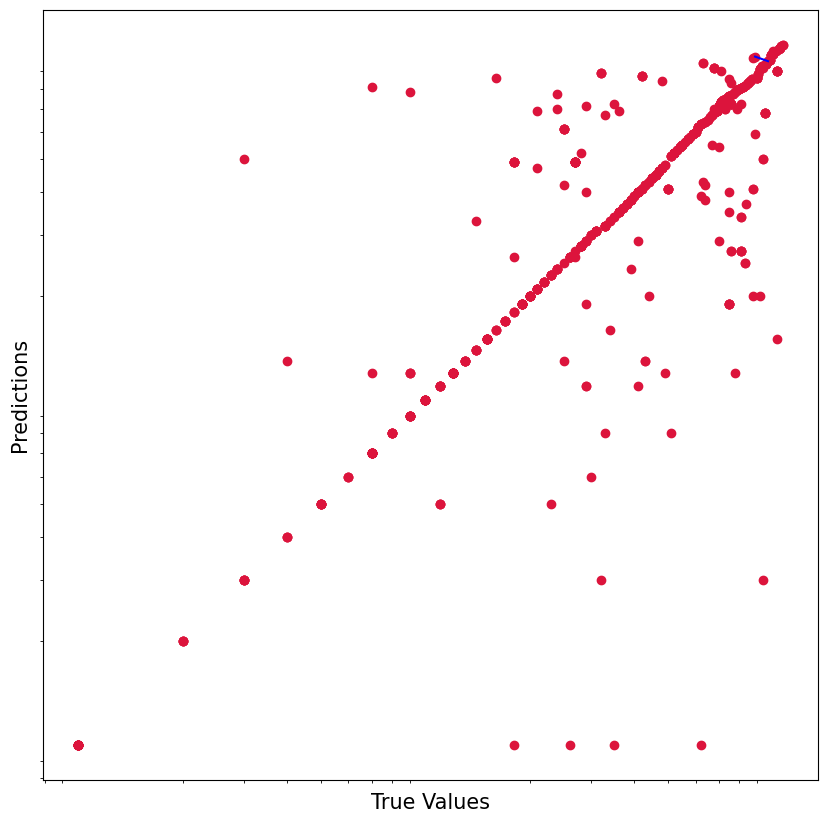

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(y_testOOB, bestAlgoOOBpred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(bestAlgoOOBpred), max(y_testOOB))
p2 = min(min(bestAlgoOOBpred), min(y_testOOB))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xticks([])
plt.yticks([])
plt.show()